In [1]:
import importlib
import pandas as pd
import pysam

import SRRS
from SRRS import plotting, utils

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setup the bam_path and chrom/start/end (Camk2d)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr3'
start = 126842239
end = 126846831

In [3]:
#setup the bam_path and chrom/start/end (Ano4)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr10'
start = 88948995
end = 89257590

In [4]:
#setup the bam_path and chrom/start/end (Bcl11b)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr12'
start = 107909741
end = 107918803

In [5]:
#setup the bam_path and chrom/start/end (Chn2)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr6'
start = 54299496
end = 54302308

In [6]:
#setup the bam_path and chrom/start/end (Inpp4b)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr8'
start = 82119031
end = 82129890

In [7]:
#setup the bam_path and chrom/start/end (Luzp2)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr7'
start = 55265030
end = 55269021

In [8]:
#setup the bam_path and chrom/start/end (Pou3f3)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr1'
start = 42695391
end = 42703580

In [9]:
#setup the bam_path and chrom/start/end (Ptprt)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr2'
start = 161520668
end = 161530060

In [10]:
#setup the bam_path and chrom/start/end (Sulf2)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr2'
start = 166072498
end = 166075426

In [11]:
#setup the bam_path and chrom/start/end (below is Timp3)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr10'
start = 86344341
end = 86350020


In [12]:
full_gtf = pd.read_csv(
    '/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/inputs/gencode.vM23.annotation.gtf',
    comment = '#',
    sep = '\t',
    header = None,
    names = ['chrom','source','kind','start','end','dot1','strand','dot2','info'],
)
gtf = full_gtf[full_gtf['kind'].isin(['exon','UTR'])]
gtf['label'] = gtf['info'].str.extract('gene_name "(.*?)";')
gtf['group'] = gtf['info'].str.extract('transcript_id "(.*?)";')

gtf.head()

,chrom,source,kind,start,end,dot1,strand,dot2,info,label,group
2,chr1,HAVANA,exon,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693.1""; transcript_id ...",4933401J01Rik,ENSMUST00000193812.1
5,chr1,ENSEMBL,exon,3102016,3102125,.,+,.,"gene_id ""ENSMUSG00000064842.1""; transcript_id ...",Gm26206,ENSMUST00000082908.1
8,chr1,HAVANA,exon,3213609,3216344,.,-,.,"gene_id ""ENSMUSG00000051951.5""; transcript_id ...",Xkr4,ENSMUST00000162897.1
9,chr1,HAVANA,exon,3205901,3207317,.,-,.,"gene_id ""ENSMUSG00000051951.5""; transcript_id ...",Xkr4,ENSMUST00000162897.1
11,chr1,HAVANA,exon,3213439,3215632,.,-,.,"gene_id ""ENSMUSG00000051951.5""; transcript_id ...",Xkr4,ENSMUST00000159265.1


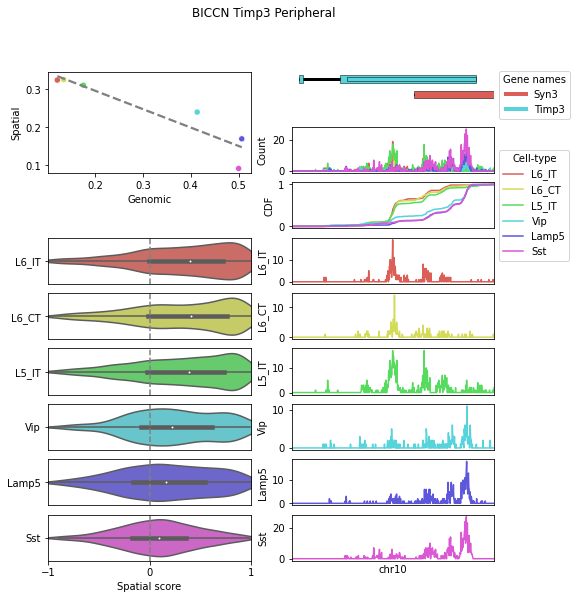

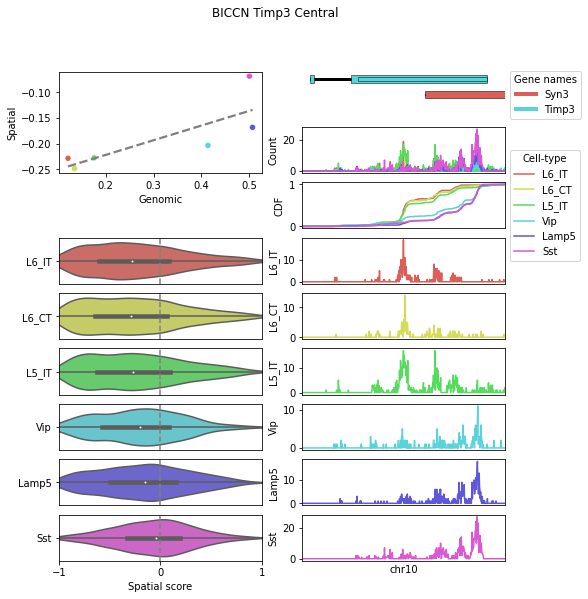

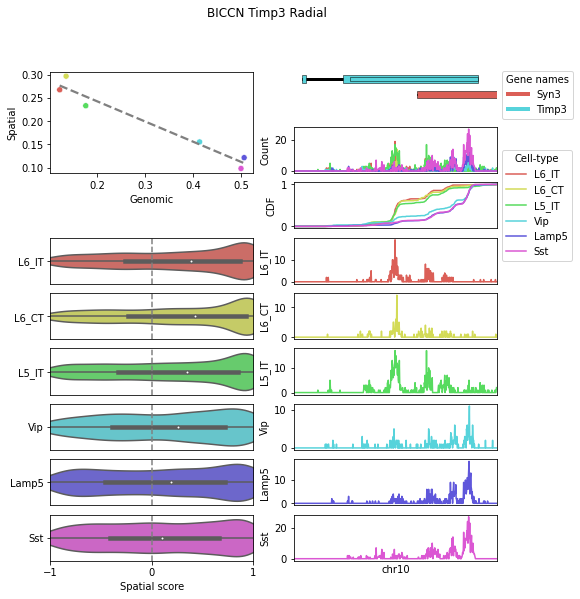

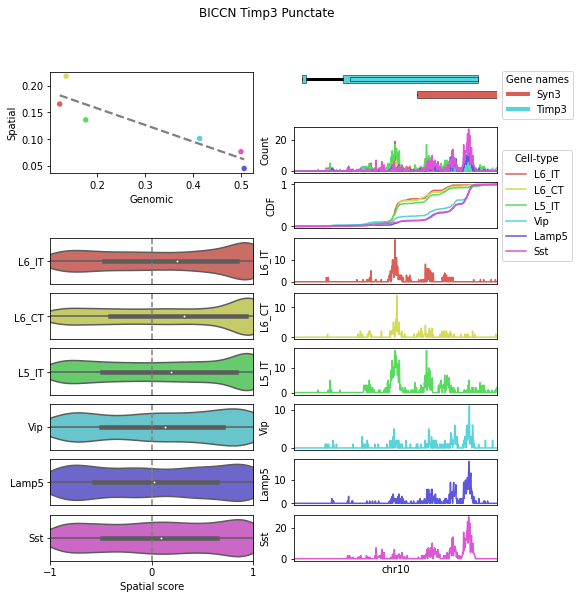

In [13]:
spatial_path_dicts = {
    'Peripheral':'../../nf_pipeline/outputs/SRRS_20220526/gene_cell/BICCN_mouse1_peripheral_gene_cell.csv',
    'Central':'../../nf_pipeline/outputs/SRRS_20220526/gene_cell/BICCN_mouse1_central_gene_cell.csv',
    'Radial':'../../nf_pipeline/outputs/SRRS_20220526/gene_cell/BICCN_mouse1_radial_gene_cell.csv',
    'Punctate':'../../nf_pipeline/outputs/SRRS_20220526/gene_cell/BICCN_mouse1_punctate_gene_cell.csv',
}

for metric,spatial_path in spatial_path_dicts.items():
    srrs_df = pd.read_csv(spatial_path)
    srrs_df = srrs_df[
        srrs_df['gene'].eq('Timp3') &
        srrs_df['num_gene_spots'].gt(1)
    ]

    mop_to_10x_ann_map = {
        'Astro_1':'Astro','Astro_2':'Astro','Astro_3':'Astro',
        'Endo':'Endo',
        'L23_IT_1':'L23 IT','L23_IT_2':'L23 IT','L23_IT_3':'L23 IT','L23_IT_4':'L23 IT','L23_IT_5':'L23 IT',
        #'L45_IT_1','L45_IT_2','L45_IT_3','L45_IT_4','L45_IT_5','L45_IT_SSp_1','L45_IT_SSp_2',
        'L56_NP_1':'L5/6 NP','L56_NP_2':'L5/6 NP',
        'L5_ET_1':'L5_ET','L5_ET_2':'L5_ET','L5_ET_3':'L5_ET','L5_ET_4':'L5_ET','L5_ET_5':'L5_ET','L5_IT_1':'L5_IT','L5_IT_2':'L5_IT','L5_IT_3':'L5_IT','L5_IT_4':'L5_IT',
        'L6_CT_1':'L6_CT','L6_CT_2':'L6_CT','L6_CT_3':'L6_CT','L6_CT_4':'L6_CT','L6_CT_5':'L6_CT','L6_CT_6':'L6_CT','L6_CT_7':'L6_CT','L6_CT_8':'L6_CT','L6_CT_9':'L6_CT',
        'L6_IT_1':'L6_IT','L6_IT_2':'L6_IT','L6_IT_3':'L6_IT',
        'L6_IT_Car3':'L6 IT Car3',
        'L6b_1':'L6b','L6b_2':'L6b','L6b_3':'L6b','Lamp5_1':'Lamp5',
        'Lamp5_2':'Lamp5','Lamp5_3':'Lamp5','Lamp5_4':'Lamp5','Lamp5_5':'Lamp5','Lamp5_6':'Lamp5','Lamp5_7':'Lamp5','Lamp5_8':'Lamp5','Lamp5_9':'Lamp5',
        #'Micro_1','Micro_2',
        'OPC':'OPC',
        'Oligo_1':'Oligo','Oligo_2':'Oligo','Oligo_3':'Oligo',
        #'PVM',
        #'Peri',
        'Pvalb_1':'Pvalb','Pvalb_10':'Pvalb','Pvalb_11':'Pvalb','Pvalb_12':'Pvalb','Pvalb_2':'Pvalb','Pvalb_3':'Pvalb','Pvalb_4':'Pvalb','Pvalb_5':'Pvalb','Pvalb_6':'Pvalb','Pvalb_7':'Pvalb','Pvalb_8':'Pvalb','Pvalb_9':'Pvalb',
        'SMC':'SMC',
        'Sncg_1':'Sncg','Sncg_2':'Sncg',
        'Sst_1':'Sst','Sst_2':'Sst','Sst_3':'Sst','Sst_4':'Sst','Sst_5':'Sst','Sst_6':'Sst','Sst_7':'Sst','Sst_8':'Sst','Sst_Chodl':'Sst',
        'VLMC':'VLMC',
        'Vip_1':'Vip','Vip_10':'Vip','Vip_2':'Vip','Vip_3':'Vip','Vip_4':'Vip','Vip_5':'Vip','Vip_6':'Vip','Vip_7':'Vip','Vip_8':'Vip','Vip_9':'Vip',
        #'striatum_1','striatum_2',
        #'unannotated',
        #'ventricle_1','ventricle_2'
    }

    srrs_df['annotation'] = srrs_df['annotation'].map(mop_to_10x_ann_map)
    srrs_df = srrs_df.dropna()
    
    importlib.reload(utils)
    importlib.reload(plotting)

    fig = plotting.read_buildup_plot(
        bam_path, locus=(chrom, start, end), 
        ann_df=gtf, spatial_df=srrs_df,
        stratify_tag='XO', 
        ws=10, min_tag_reads=100,
    )

    plt.suptitle('BICCN Timp3 {}'.format(metric))
    plt.show()
    plt.close()

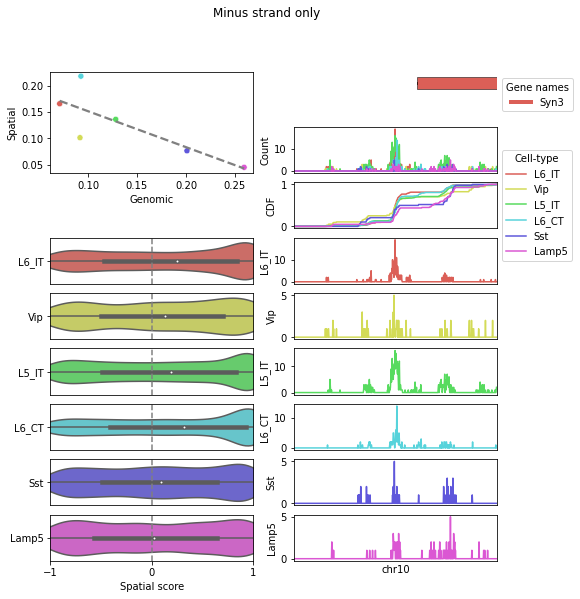

CPU times: user 2.01 s, sys: 118 ms, total: 2.13 s
Wall time: 2.15 s


In [14]:
%%time
importlib.reload(utils)
importlib.reload(plotting)

fig = plotting.read_buildup_plot(
    bam_path, locus=(chrom, start, end), 
    ann_df=gtf, spatial_df=srrs_df,
    stratify_tag='XO', 
    ws=10, min_tag_reads=20,
    strand='-',
)

plt.suptitle('Minus strand only')
plt.show()
plt.close()

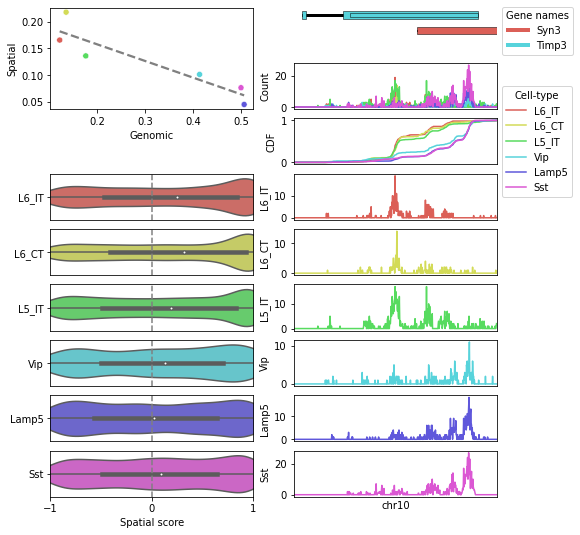

CPU times: user 2.01 s, sys: 111 ms, total: 2.12 s
Wall time: 2.13 s


In [15]:
%%time
importlib.reload(utils)
importlib.reload(plotting)

fig = plotting.read_buildup_plot(
    bam_path, locus=(chrom, start, end), 
    ann_df=gtf, spatial_df=srrs_df,
    stratify_tag='XO', 
    ws=10, min_tag_reads=100,
    strand=None,
)


plt.show()
plt.close()

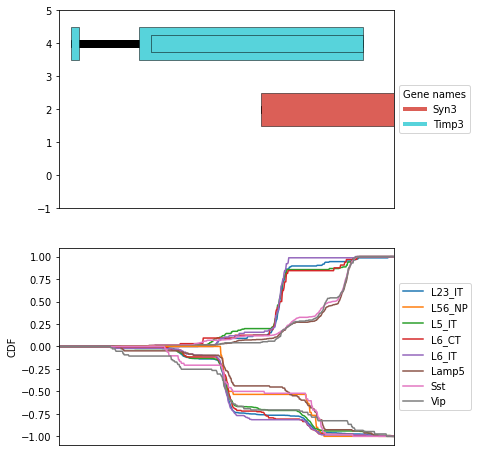

In [16]:
import collections
import pandas as pd
import numpy as np
import pysam

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection, PatchCollection
from matplotlib.lines import Line2D
from matplotlib import cm
import seaborn as sns


plus_counts = utils.bam_read_positions(
    bam_path,
    locus=(chrom, start, end),
    stratify_tag='XO',strand='+',
    min_tag_reads=20,
)
plus_counts['strand'] = '+'

minus_counts = utils.bam_read_positions(
    bam_path,
    locus=(chrom, start, end),
    stratify_tag='XO',strand='-',
    min_tag_reads=20,
)
minus_counts['strand'] = '-'

counts_df = pd.concat((plus_counts,minus_counts))

import numpy as np
ws = 10
bins = np.arange(start,end+ws,ws)
labels = bins[:-1]
counts_df['window'] = pd.cut(counts_df['pos'], bins=bins, labels=labels)
counts_df = counts_df.groupby(['strat','window','strand']).size().reset_index(name='count')

counts_df['Cell-type'] = counts_df['strat']

counts_df.loc[counts_df['strand'].eq('-'),'count'] *= -1

counts_df['CDF'] = (
    counts_df.groupby(['Cell-type','strand'])['count']
        .apply(lambda v: v.cumsum()/abs(v.sum()))
)

counts_df['count'] += 1

fig,axs = plt.subplots(nrows=2, sharex=True, figsize=(6,8))
ann_ax = axs[0]
ann_df = gtf

#Subsetting the gene annotation info to this region
genes = []
if len(ann_df) > 0:
    ann_df = ann_df[
        ann_df['chrom'].eq(chrom) &
        (ann_df['start'].between(start,end) | ann_df['end'].between(start,end))
    ]

    genes = ann_df['label'].unique()
    gene_colors = {g:c for g,c in zip(genes,sns.color_palette("hls", len(genes)))}


#Drawing the gene annotations exons/UTRs
for i,((gene,transcript_id),transcript_df) in enumerate(ann_df.groupby(['label','group'])):
    transcript_df = ann_df[ann_df['label'].eq(gene) & ann_df['group'].eq(transcript_id)]

    y = 2*(i+1)
    #Draw a line for the intron from the total start to total end
    min_x_transcript = transcript_df['start'].min()
    max_x_transcript = transcript_df['end'].max()

    intron_line = mpatches.Rectangle(
        (min_x_transcript, y - 0.1),
        max_x_transcript - min_x_transcript, 0.2,
        linewidth=1,edgecolor='k',facecolor='k',
    )
    ann_ax.add_patch(intron_line)

    for _,feature in transcript_df.iterrows():

        if 'UTR' in feature['kind']:
            height = 0.5

        elif feature['kind'] == 'exon':
            height = 1

        else:
            continue

        ymax = y+1
        x = feature['start']
        width = feature['end']-feature['start']

        rect = mpatches.Rectangle(
            (x, y - height/2),
            width, height,
            linewidth=0.5,edgecolor='k',facecolor=gene_colors[feature['label']],
        )
        ann_ax.add_patch(rect)

    ann_ax.set_ylim(-1,y+1)
    ann_ax.set_xlim(start,end)
    ann_ax.set_xticks([])

#Add legend on top of plot
handles = [Line2D([0],[0], color=gene_colors[g], lw=4) for g in genes]
ann_ax.legend(
    handles, genes,
    title='Gene names',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
)


hue_order = counts_df['Cell-type'].unique()
sns.lineplot(
    x = 'window',
    y = 'CDF',
    hue = 'Cell-type',
    hue_order = hue_order,
    data = counts_df[counts_df['strand'].eq('+')],
    ax = axs[1],
)
sns.lineplot(
    x = 'window',
    y = 'CDF',
    hue = 'Cell-type',
    hue_order = hue_order,
    legend = False,
    data = counts_df[counts_df['strand'].eq('-')],
    ax = axs[1],
)
axs[1].legend(loc='center left', bbox_to_anchor=(1,0.5))


plt.show()
plt.close()



In [17]:
for (ont,strand),g in counts_df.groupby(['Cell-type','strand']):
    if strand == '-':
        break


In [18]:
g['count'].min()

-31

In [19]:
g[g['count'].ne(0)]['count'].sum()

-131

In [20]:
g[g['count'].ne(0)]['count'].cumsum()

1         1
3         2
5         3
7         4
9         5
       ... 
1127   -135
1129   -134
1131   -133
1133   -132
1135   -131
Name: count, Length: 506, dtype: int64

In [21]:
g[g['count'].ne(0)]['count'].cumsum()

1         1
3         2
5         3
7         4
9         5
       ... 
1127   -135
1129   -134
1131   -133
1133   -132
1135   -131
Name: count, Length: 506, dtype: int64